In [1]:
import matplotlib.pyplot as plt
import json
import itertools
import re
import pandas as pd
import numpy as np

In [2]:
speed = [5704,29380,"LA","LA_with_delay"]
change_time = [1198.73,1672.38,2157.22,2193.65,7200]
result = {}
cata = ["app_packets_received","PDR_in_percent","latency","duty_cycle","app_per_sec"]
#cata = ["app_packets_received",]
for i in speed:
    title = '{}'.format(i)
    result[title] = {}
    result[title]["app_packets_received"] = []
    result[title]["PDR_in_percent"] = []
    result[title]["latency"] = []
    result[title]["duty_cycle"] = []
    result[title]["app_per_sec"] = []
    
# 50kbps
with open('./examples/mesh/results/link_adaption_simple/50kbps.txt','r') as f:
    text = f.read()
    app_packets_received = re.findall('app-packet-received in this period = (.+)',text)
    PDR_in_percent = re.findall('pdr=(.+),current_level=.+',text)
    latency = re.findall('latency in this period = (.+)',text)
    duty_cycle = re.findall('duty_cycle_joined_average=(.+)',text)
    app_per_sec = re.findall('app-packet-received per sec = (.+)',text)
    title = "29380"
    for item in cata:
        for t in range(len(app_packets_received)):
            result[title][str(item)].append(float(eval(item)[t]))

In [3]:
# 1000kbps
with open('./examples/mesh/results/link_adaption_simple/1000kbps.txt','r') as f:
    text = f.read()
    app_packets_received = re.findall('app-packet-received in this period = (.+)',text)
    PDR_in_percent = re.findall('pdr=(.+),current_level=.+',text)
    latency = re.findall('latency in this period = (.+)',text)
    duty_cycle = re.findall('duty_cycle_joined_average=(.+)',text)
    app_per_sec = re.findall('app-packet-received per sec = (.+)',text)
    title = "5704"
    for item in cata:
        for t in range(len(app_packets_received)):
            result[title][str(item)].append(float(eval(item)[t]))

In [4]:
# LA
with open('./examples/mesh/results/link_adaption_simple/LA.txt','r') as f:
    text = f.read()
    app_packets_received = re.findall('app-packet-received in this period = (.+)',text)
    PDR_in_percent = re.findall('pdr=(.+),current_level=.+',text)
    latency = re.findall('latency in this period = (.+)',text)
    duty_cycle = re.findall('duty_cycle_joined_average=(.+)',text)
    app_per_sec = re.findall('app-packet-received per sec = (.+)',text)
    title = "LA"
    for item in cata:
        for t in range(len(app_packets_received)):
            result[title][str(item)].append(float(eval(item)[t]))

In [5]:
# LA with delay
with open('./examples/mesh/results/link_adaption_simple/LA_with_delay.txt','r') as f:
    text = f.read()
    app_packets_received = re.findall('app-packet-received in this period = (.+)',text)
    PDR_in_percent = re.findall('pdr=(.+),current_level=.+',text)
    latency = re.findall('latency in this period = (.+)',text)
    duty_cycle = re.findall('duty_cycle_joined_average=(.+)',text)
    app_per_sec = re.findall('app-packet-received per sec = (.+)',text)
    title = "LA_with_delay"
    for item in cata:
        for t in range(len(app_packets_received)):
            result[title][str(item)].append(float(eval(item)[t]))

In [6]:
x_axis = [50*i for i in range(1,len(latency)+1)]

In [7]:
#result['5704']['app_per_sec']

In [8]:
len(x_axis)

143

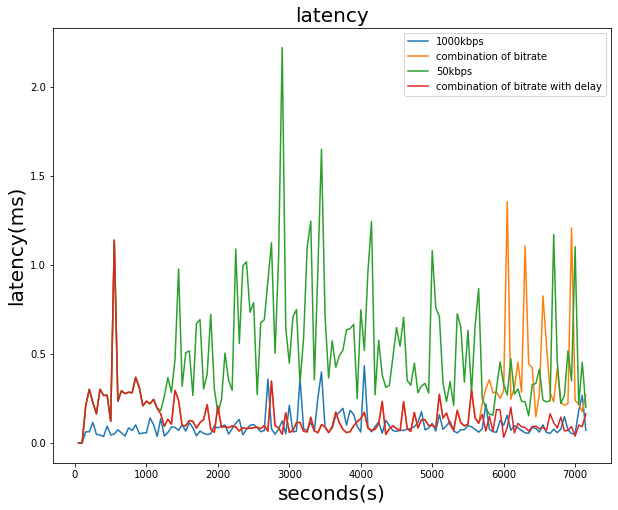

In [23]:
# latency
plt.figure(figsize=(10,8))
plt.title('latency',fontsize=20)
plt.plot(x_axis,result['5704']['latency'],label='1000kbps')
plt.plot(x_axis,result['LA']['latency'],label='combination of bitrate')
plt.plot(x_axis,result['29380']['latency'],label='50kbps')
plt.plot(x_axis,result['LA_with_delay']['latency'],label='combination of bitrate with delay')
plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('latency(ms)',fontsize=20)
#plt.xlim(0, 10)
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
#plt.yticks([])
#plt.yscale('linear')
plt.yticks(np.arange(0,2.5,0.5))
plt.savefig('./examples/mesh/example for low latency/latency.jpg',bbox_inches = 'tight')
plt.show()

In [10]:
#result['29380']['duty_cycle']

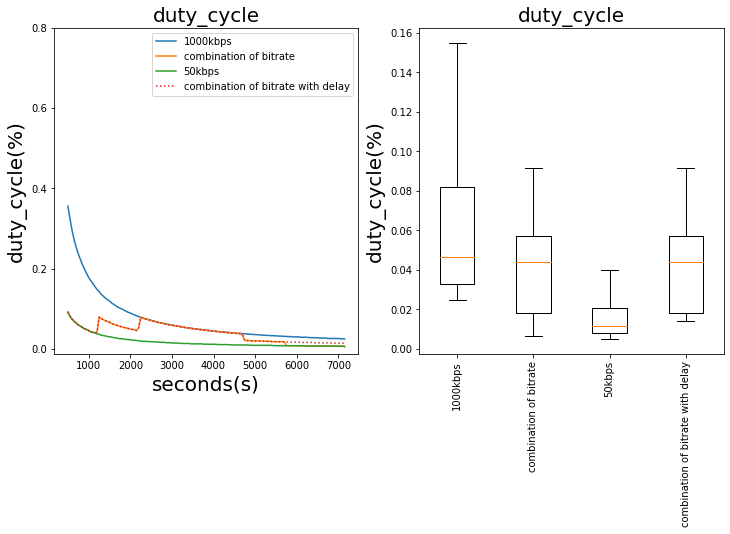

In [21]:
# duty cycle
# subplot 1
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

plt.title('duty_cycle',fontsize=20)
plt.plot(x_axis[9:],result['5704']['duty_cycle'][9:],label='1000kbps')
plt.plot(x_axis[9:],result['LA']['duty_cycle'][9:],label='combination of bitrate')
plt.plot(x_axis[9:],result['29380']['duty_cycle'][9:],label='50kbps')
plt.plot(x_axis[9:],result['LA_with_delay']['duty_cycle'][9:],label='combination of bitrate with delay',linestyle='dotted')
plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('duty_cycle(%)',fontsize=20)
#plt.xlim(0, 10)
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
#plt.yticks([])
#plt.yscale('linear')
plt.yticks(np.arange(0,1,0.2))

plt.subplot(1, 2, 2)
#plt.figure(figsize=(8,6))
labels = '1000kbps','combination of bitrate','50kbps','combination of bitrate with delay'
plt.boxplot([
             result['5704']['duty_cycle'][9:],
             result['LA']['duty_cycle'][9:],
             result['29380']['duty_cycle'][9:], 
             result['LA_with_delay']['duty_cycle'][9:]
            ],labels = labels,showfliers=False)
plt.title('duty_cycle',fontsize=20)
#plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('duty_cycle(%)',fontsize=20)
plt.xticks(rotation=90)
#plt.figure().align_labels()
plt.savefig('./examples/mesh/example for low latency/duty_cycle.jpg',bbox_inches = 'tight')

plt.show()



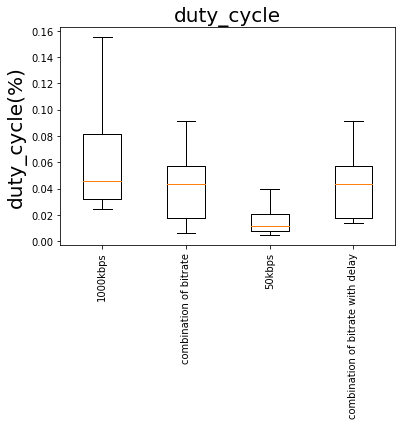

In [22]:

#plt.figure(figsize=(8,6))
labels = '1000kbps','combination of bitrate','50kbps','combination of bitrate with delay'
plt.boxplot([
             result['5704']['duty_cycle'][9:],
             result['LA']['duty_cycle'][9:],
             result['29380']['duty_cycle'][9:], 
             result['LA_with_delay']['duty_cycle'][9:]
            ],labels = labels,showfliers=False)
plt.title('duty_cycle',fontsize=20)
#plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('duty_cycle(%)',fontsize=20)
plt.xticks(rotation=90)
#plt.figure().align_labels()
plt.savefig('./examples/mesh/example for low latency/duty_cycle_single.jpg',bbox_inches = 'tight')

plt.show()

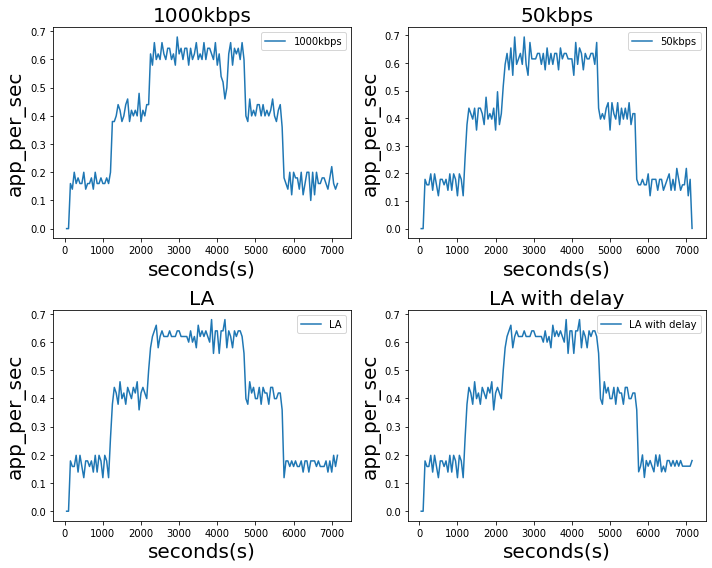

In [13]:
# throughput 
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)

plt.title('1000kbps',fontsize=20)
plt.plot(x_axis,result['5704']['app_per_sec'],label='1000kbps')
plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('app_per_sec',fontsize=20)
plt.legend()


plt.subplot(2, 2, 2)
#plt.figure(figsize=(10,8))
plt.title('50kbps',fontsize=20)
plt.plot(x_axis,result['29380']['app_per_sec'],label='50kbps')
plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('app_per_sec',fontsize=20)
plt.legend()

plt.subplot(2, 2, 3)
#plt.figure(figsize=(10,8))
plt.title('LA',fontsize=20)
plt.plot(x_axis,result['LA']['app_per_sec'],label='LA')
plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('app_per_sec',fontsize=20)
plt.legend()

plt.subplot(2, 2, 4)
#plt.figure(figsize=(10,8))
plt.title('LA with delay',fontsize=20)
plt.plot(x_axis,result['LA_with_delay']['app_per_sec'],label='LA with delay')
plt.xlabel('seconds(s)',fontsize=20)
plt.ylabel('app_per_sec',fontsize=20)
plt.legend()

plt.tight_layout()
plt.savefig('./examples/mesh/example for low latency/throughput.jpg',bbox_inches = 'tight')

plt.show()